**Machine Learning Basic Principles 2018 - Data Analysis Project Report - group 192**

# *Using Arficial Neural Networks for genre classification* 

## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction
This report introduces a complete machine learning solution for a genre classification problem. The aim is to develop a solution that is capable to classify a song into one of the ten given genres based on given features abstracted from an audio strip. Such a model has several applications. For example, the solution can be used in music streaming services like Apple Music, Spotify, and YouTube Music to enhance user experience. These services provide suggestions for users based on their previous listening history and given preference data. The most fundamental solution behind this feature is to be able to find similar songs i.e. classify them. Thus, the task showcased in this report is extremely relevant.


### The problem
The task in hand is to develop predictors h(x) for each genre, which maps each feature vector into a probability that the genre is Y. Now the predictors give for each feature vector probabilities for each genre. The genre with the highest probability is chosen. The performance of the solution is evaluated with the log loss method and the accuracy of predictions. The log loss gives a more sophisticated view into the performance of a model compared to pure accuracy. For example, log loss penalizes highly from giving a low probability to a genre that turned out to be correct


*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# Load the data and cleanup
data_df = pd.read_csv('train_data.csv',header=None)
data = np.asarray(data_df)
labels_df = pd.read_csv('train_labels.csv',header=None)
labels = np.asarray(labels_df)

In [4]:
display(data_df.head())
#data_df.describe()
print(data.shape)
print(labels_df.shape)

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.7,...,0.216490,0.36548,0.093584,0.166870,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463
1,2309.4,4780.4,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.0,3374.7,...,0.100670,0.14739,0.102560,0.213040,0.082041,0.080967,0.076450,0.052523,0.052357,0.055297
2,2331.9,4607.0,4732.3,5007.0,3164.9,3171.9,2915.7,3282.3,2400.0,1895.2,...,0.126760,0.36321,0.114200,0.223780,0.100770,0.186910,0.067270,0.061138,0.085509,0.049422
3,3350.9,6274.4,5037.0,4609.7,3438.8,3925.8,3746.4,3539.4,3053.7,3075.4,...,0.096479,0.28950,0.074124,0.201580,0.049032,0.130210,0.045800,0.080885,0.148910,0.042027
4,2017.6,3351.8,2924.9,2726.3,1979.9,1930.9,2083.4,1889.2,1695.4,1911.7,...,0.138340,0.38266,0.079402,0.063495,0.053717,0.086750,0.062090,0.048999,0.033159,0.070813


(4363, 264)
(4363, 1)


In [5]:
labels_df.head()
labels[0:20,:]
data[0:5,0:5]
data.shape
labels.shape

(4363, 1)

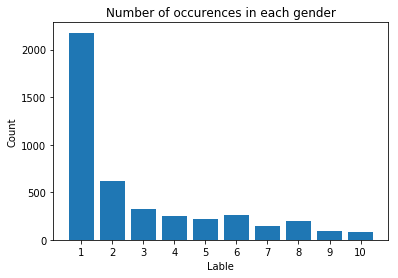

In [6]:
aa = labels == 1
sum(aa)
counts = np.zeros(10)
label_values = np.asarray(range(1,11))
for i in range(10):
    counts[i] = sum(labels == i+1)

# plt.xkcd()
plt.bar(label_values, counts)
plt.xticks(label_values)
plt.ylabel('Count')
plt.xlabel('Label')
plt.title('Number of occurences in each gender')
plt.show()

In [7]:
import tensorflow as tf

In [43]:
np.where(labels==3)

(array([2188, 2196, 2197, 2214, 2220, 2223, 2234, 2235, 2245, 2248, 2259,
        2261, 2265, 2275, 2276, 2277, 2285, 2290, 2292, 2301, 2306, 2313,
        2319, 2321, 2334, 2337, 2340, 2343, 2345, 2357, 2368, 2369, 2381,
        2383, 2387, 2388, 2391, 2395, 2397, 2398, 2401, 2418, 2430, 2438,
        2439, 2456, 2465, 2466, 2471, 2485, 2493, 2498, 2501, 2507, 2510,
        2519, 2520, 2524, 2544, 2552, 2554, 2556, 2557, 2558, 2565, 2571,
        2575, 2579, 2580, 2583, 2596, 2598, 2603, 2606, 2622, 2628, 2630,
        2635, 2645, 2647, 2656, 2657, 2669, 2672, 2675, 2685, 2690, 2691,
        2693, 2695, 2707, 2718, 2732, 2737, 2761, 2775, 2786, 2804, 2805,
        2840, 2842, 2848, 2855, 2869, 2877, 2887, 2891, 2892, 2893, 2894,
        2902, 2908, 2924, 2940, 2964, 2979, 2982, 2983, 2986, 2990, 2992,
        3006, 3014, 3015, 3024, 3027, 3035, 3037, 3039, 3047, 3056, 3058,
        3078, 3087, 3105, 3115, 3130, 3153, 3159, 3166, 3173, 3175, 3188,
        3202, 3222, 3224, 3225, 3238, 

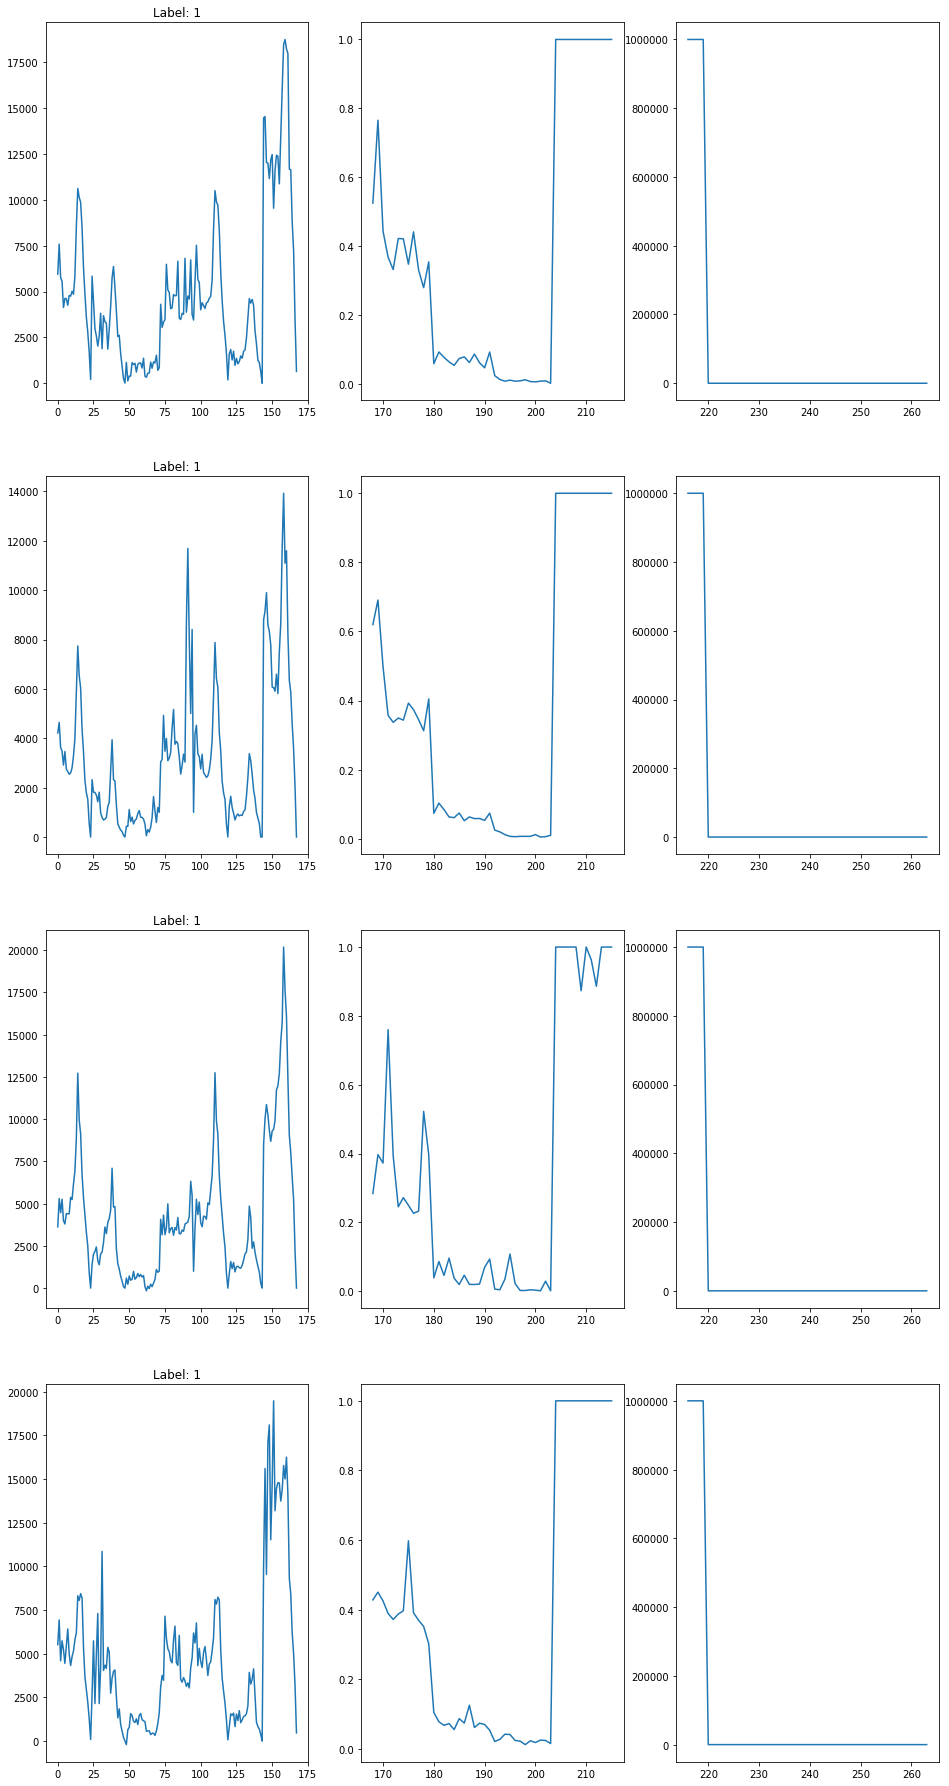

In [36]:
rythm_range = np.arange(0,168) # Indexes from 0 to 167
rythm = data[:,rythm_range]
pitch_range = np.arange(168, 216)
pitch = data[:, pitch_range]
timbre_range = np.arange(216, 264)
timbre = data[:, timbre_range]

plot_range = np.asarray([10,11,15,27])
iters = len(plot_range)

fig = plt.figure(figsize=(16, 8*len(plot_range)))


for i in range(iters):
    plt.subplot(iters,3,i*3+1)
    plt.plot(rythm_range, rythm[plot_range[i],:])
    plt.title("Label: " + str(labels[i,0]))
    plt.subplot(iters,3,i*3+2)
    plt.plot(pitch_range, pitch[plot_range[i],:])
    plt.subplot(iters,3,i*3+3)
    plt.plot(timbre_range, timbre[plot_range[i],:])

plt.show()    
    


In [30]:
plot_range = range(10,12)

list(zip(plot_range))
np.arange(4,6)

array([4, 5])

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [ ]:
# Trials with ML algorithms

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [ ]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *